In [27]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import seaborn as sns
import cv2

# Ecualizacion de Histogramas

In [28]:
img = cv2.imread('ecua2.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('ecua1.png', cv2.IMREAD_GRAYSCALE)

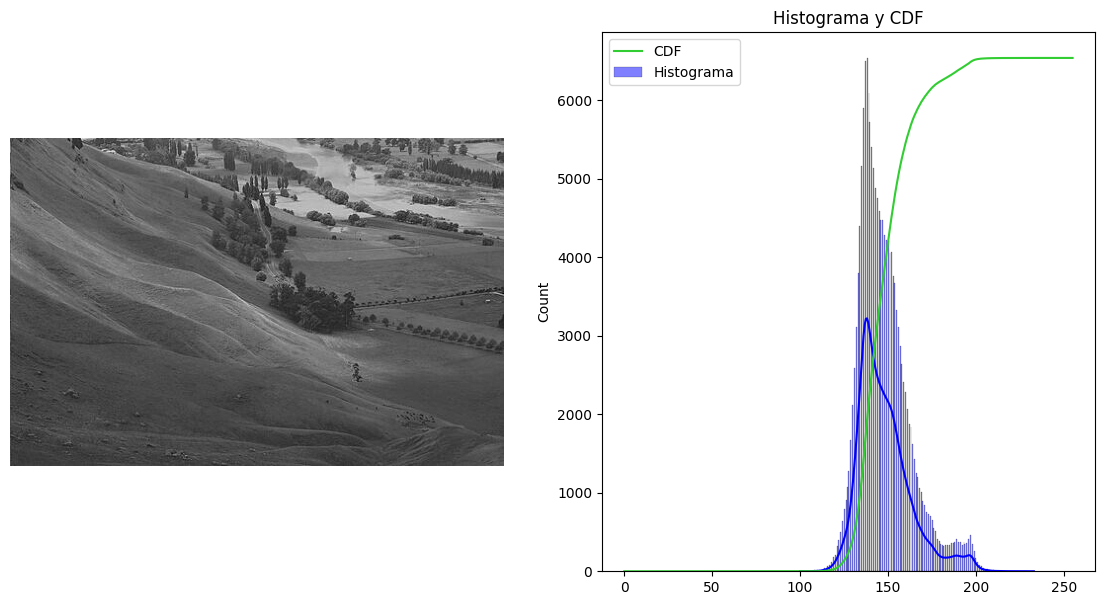

In [ ]:
m, n = img.shape

# Compute histogram and CDF
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_norm = cdf * float(hist.max()) / cdf.max()  # Normalize the CDF

# Plot the image and its histogram with CDF
plt.figure(figsize=(14, 7))

# Display the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

# Plot histogram and CDF
plt.subplot(1, 2, 2)
sns.histplot(img.ravel(), kde=True, bins=256, label='Histograma', color='blue')
plt.plot(bins[:-1], cdf_norm, color='limegreen', label='CDF')
plt.legend()
plt.title('Histograma')
plt.show()

In [30]:
# equ = cv2.equalizeHist(img)
# res = np.hstack((img,equ)) #stacking images side-by-side
# cv2.imwrite('res.png',res)

In [ ]:
def ecualizar(img):
    flat = img.flatten()

    hist = np.bincount(flat, minlength=256)

    cdf = hist.cumsum()

    cdf_min = cdf[np.nonzero(cdf)].min()
    total_pixels = flat.size
    cdf_norm = np.round((cdf - cdf_min) * 255 / (total_pixels - cdf_min)).astype(np.uint8)

    ecu = cdf_norm[flat]
    ecu_img = ecu.reshape(img.shape)

    return ecu_img

ecualizada=ecualizar(img)

cv2.imwrite('res.png', ecualizada)


True

Text(0.5, 1.0, 'Imagen Ecualizada')

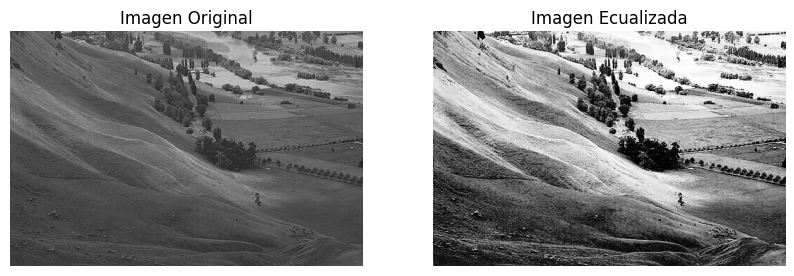

In [32]:
img2 = cv2.imread('res.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.title('Imagen Ecualizada')

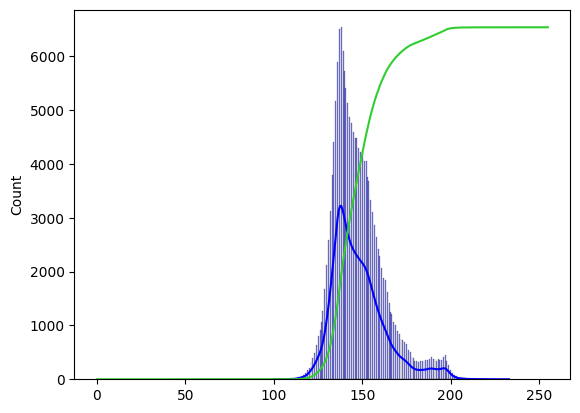

In [ ]:
m, n = img2.shape

hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_norm = cdf * float(hist.max()) / cdf.max()
sns.histplot(img.ravel(), kde=True, bins=256, label='Histograma', color='blue')
plt.plot(bins[:-1], cdf_norm, color='limegreen', label='CDF')

# Expansion de Histograma